In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import hamiltonian as hm
import glob

In [31]:
L = 11
dense = False
if (dense): 
    fix = 'dense'
    prefix = 'data/otoc_dense'
else: 
    fix = 'sparse'
    prefix = 'data/otoc_sparse'
sites = np.arange(L)
forenames = glob.glob(prefix + "foreL" + str(L) + "v*.npy")
backnames = glob.glob(prefix + "backL" + str(L) + "v*.npy")

In [32]:
otocsfore = []
otocsback = []
vs        = []
vsback    = []
for fname in forenames:
    otocsfore.append(np.load(fname))
    vs.append(int(fname.replace(prefix + "foreL" + str(L) + "v", "").replace(".npy", "")))
for fname in backnames:
    otocsback.append(np.load(fname)[::-1])
    vsback.append(int(fname.replace(prefix + "backL" + str(L) + "v", "").replace(".npy", "")))
vs        = np.array(vs)
otocsfore = np.array(otocsfore)
otocsback = np.array(otocsback)
args      = np.argsort(vs)
vs        = vs[args]
otocsfore = otocsfore[args]
otocsback = otocsback[np.argsort(vsback)]

5 [-0.01863469 -0.52665517]
6 [-0.01499654 -0.76123074]
7 [-0.02684939 -1.01520536]
8 [-0.05481969 -1.2313968 ]
9 [-0.09374391 -1.40537931]
10 [-0.13925154 -1.54360052]
11 [-0.18834426 -1.65356453]
12 [-0.23906977 -1.74166548]
14 [-0.34089807 -1.8711033 ]
16 [-0.43940306 -1.95911212]
18 [-0.53267532 -2.0212405 ]
20 [-0.62024897 -2.06656401]
22 [-0.70225806 -2.10057152]
24 [-0.77906985 -2.12670826]


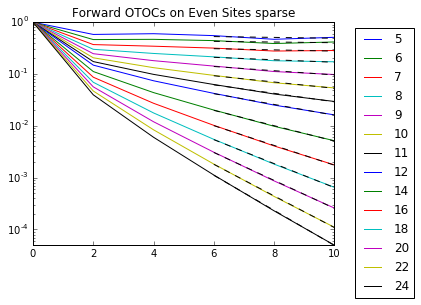

In [33]:
ax = plt.subplot(111)
gammas_fore_even = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[::2], otocfore[::2], label = str(vs[idx]))
    x = sites[6::2]
    y = otocfore[6::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_even.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Even Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

5 [-0.02000906 -0.93925979]
6 [ -2.14331958e-04  -1.39575974e+00]
7 [-0.00282018 -1.8102427 ]
8 [-0.02829851 -2.1418827 ]
9 [-0.06814774 -2.40659434]
10 [-0.11596591 -2.62214283]
11 [-0.16776867 -2.80160921]
12 [-0.22116641 -2.95410235]
14 [-0.32764958 -3.20177524]
16 [-0.42976997 -3.39735244]
18 [-0.52579677 -3.55830848]
20 [-0.61548064 -3.69488247]
22 [-0.69912758 -3.81347522]
24 [-0.77722971 -3.91830827]


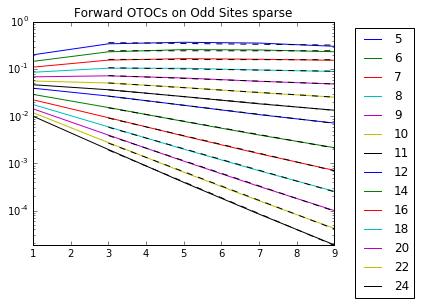

In [34]:
ax = plt.subplot(111)
gammas_fore_odd = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[1::2], otocfore[1::2], label = str(vs[idx]))
    x = sites[3::2]
    y = otocfore[3::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_odd.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Odd Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'foreoddL' + str(L) + '.pdf')
plt.show()

5 [ 0.00273968 -1.71304317]
6 [-0.18584726 -0.58362294]
7 [-0.24265664 -0.24876953]
8 [-0.21059792 -0.64587026]
9 [-0.19957214 -1.01379288]
10 [-0.21289772 -1.27798383]
11 [-0.24136447 -1.46708659]
12 [-0.27845707 -1.60621835]
14 [-0.3643741  -1.79325845]
16 [-0.45454283 -1.91024083]
18 [-0.54302541 -1.98849047]
20 [-0.62764722 -2.043504  ]
22 [-0.70773523 -2.08369552]
24 [-0.78324135 -2.11397073]


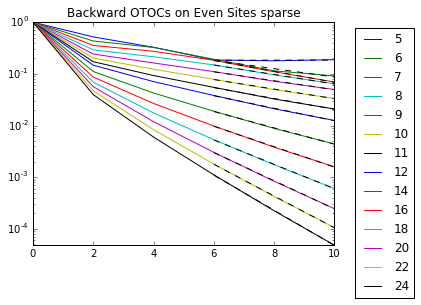

In [35]:
ax = plt.subplot(111)
gammas_back_even = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[::2], otocback[::2], label = str(vs[idx]))
    x = sites[6::2]
    y = otocback[6::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back_even.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs on Even Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'backevenL' + str(L) + '.pdf')
plt.show()

5 [-0.12752987 -0.71392221]
6 [-0.12442261 -1.01282207]
7 [-0.09306767 -1.51500554]
8 [-0.08935173 -1.93899047]
9 [-0.11031165 -2.26560509]
10 [-0.1460904 -2.5210883]
11 [-0.18999414 -2.72690443]
12 [-0.23802614 -2.89735483]
14 [-0.33802616 -3.16678469]
16 [-0.4366139  -3.37424651]
18 [-0.53055137 -3.54224273]
20 [-0.61891962 -3.68325492]
22 [-0.70169632 -3.80478589]
24 [-0.77919953 -3.91164241]


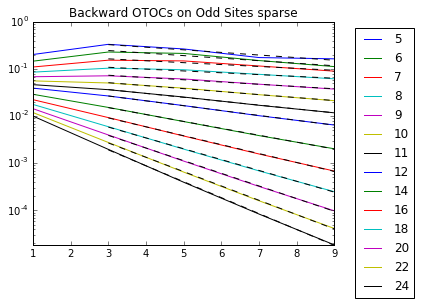

In [36]:
ax = plt.subplot(111)
gammas_back_odd = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[1::2], otocback[1::2], label = str(vs[idx]))
    x = sites[3::2]
    y = otocback[3::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back_odd.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs on Odd Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'backoddL' + str(L) + '.pdf')
plt.show()

Forward Odd:   v_butterfly=11.8925214373
Backward Odd:  v_butterfly= 11.8122527475
Forward Even:  v_butterfly= 11.7582378663
Backward Even: v_butterfly= 11.5781690452


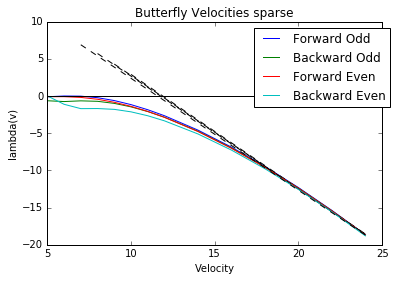

In [37]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore_odd,  label = "Forward Odd")
coeffs = np.polyfit(vs[10:], gammas_fore_odd[10:], deg=1)
ax.plot(vs[5:], coeffs[0]*vs[5:] + coeffs[1], 'k--')
print("Forward Odd:   v_butterfly=" + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_back_odd,  label = "Backward Odd")
coeffs = np.polyfit(vs[10:], gammas_back_odd[10:], deg=1)
ax.plot(vs[4:], coeffs[0]*vs[4:] + coeffs[1], 'k--')
print("Backward Odd:  v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_fore_even, label = "Forward Even")
coeffs = np.polyfit(vs[10:], gammas_fore_even[10:], deg=1)
ax.plot(vs[3:], coeffs[0]*vs[3:] + coeffs[1], 'k--')
print("Forward Even:  v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, gammas_back_even, label = "Backward Even")
coeffs = np.polyfit(vs[10:], gammas_back_even[10:], deg=1)
ax.plot(vs[2:], coeffs[0]*vs[2:] + coeffs[1], 'k--')
print("Backward Even: v_butterfly= " + str(-coeffs[1]/coeffs[0]))
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
# plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

5 [-0.15078509 -0.60190428]
5 [-0.12752987 -0.71392221]
8 [-0.2007368  -0.72499378]
8 [-0.08935173 -1.93899047]
11 [-0.2613177  -1.33256422]
11 [-0.18999414 -2.72690443]
16 [-0.48732377 -1.68154309]
16 [-0.4366139  -3.37424651]
22 [-0.74464982 -1.82397683]
22 [-0.70169632 -3.80478589]


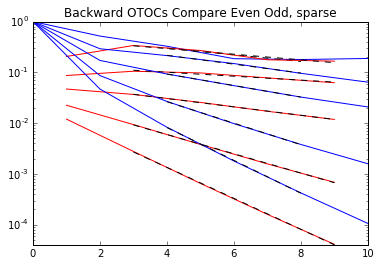

In [38]:
ax = plt.subplot(111)
for idx in range(0, len(vs), 3):
    ax.semilogy(sites[::2], otocsback[idx,::2], 'b', label = str(vs[idx]))
    x = sites[4:10:2]
    y = otocsback[idx,4:10:2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    
    ax.semilogy(sites[1::2], otocsback[idx,1::2], 'r', label = str(vs[idx]))
    x = sites[3::2]
    y = otocsback[idx,3::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
# ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Backward OTOCs Compare Even Odd, " + fix)
# plt.savefig('figures/otocs_' + fix + 'backcompareL' + str(L) + '.pdf')
plt.show()

In [21]:
print(backnames)

['data/otoc_sparsebackL11v12.npy', 'data/otoc_sparsebackL11v11.npy', 'data/otoc_sparsebackL11v10.npy', 'data/otoc_sparsebackL11v14.npy', 'data/otoc_sparsebackL11v16.npy', 'data/otoc_sparsebackL11v9.npy', 'data/otoc_sparsebackL11v8.npy', 'data/otoc_sparsebackL11v6.npy', 'data/otoc_sparsebackL11v7.npy', 'data/otoc_sparsebackL11v5.npy', 'data/otoc_sparsebackL11v18.npy', 'data/otoc_sparsebackL11v24.npy', 'data/otoc_sparsebackL11v20.npy', 'data/otoc_sparsebackL11v22.npy']


In [11]:
vs

array([ 5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 18, 20, 22, 24])

##### type(np.poly1d(coeffs))

In [12]:
vs

array([ 5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 18, 20, 22, 24])